In [17]:
from torch import ones, zeros, as_tensor, float32, eye
from torch.distributions import Normal
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import log

In [18]:
def func(theta):
    n1 = Normal(-2, 1)
    n2 = Normal(3, 1)
    return 0.5*torch.exp(n1.log_prob(theta)) + torch.exp(n2.log_prob(theta))

In [19]:
thetas = torch.linspace(-6, 7.5, 500)

In [20]:
xs = func(thetas)
val = 0.1
vals = thetas[xs > val]

In [21]:
thr1 = -3.1593
thr2 = -0.8327

thr3 = 1.3587
thr4 = 4.6593

In [22]:
ind1 = torch.where(torch.abs(thetas-thr1)<0.01)[0]
ind2 = torch.where(torch.abs(thetas-thr2)<0.01)[0]
ind3 = torch.where(torch.abs(thetas-thr3)<0.01)[0]
ind4 = torch.where(torch.abs(thetas-thr4)<0.01)[0]

In [23]:
n1 = Normal(-2, 1)
n2 = Normal(3, 1)
_ = torch.manual_seed(0)
samples1 = n1.sample((20,))
samples2 = n2.sample((40,))
samples = torch.cat([samples1, samples2])

c1 = torch.logical_and(samples > thr1, samples < thr2)
c2 = torch.logical_and(samples > thr3, samples < thr4)
c = torch.logical_or(c1, c2)
batch1 = samples[c]
batch2 = samples[torch.logical_not(c)]

In [24]:
theta_star = -2.5

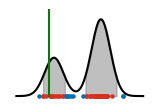

In [77]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.15))
    ax.plot(thetas.numpy(), xs.numpy(), c="k")
    x1 = xs[ind1:ind2]
    x2 = xs[ind3:ind4]
    ax.fill_between(np.linspace(thr1, thr2, len(x1)), np.zeros_like(x1.numpy()), x1.numpy(), color="gray", alpha=0.5)
    ax.fill_between(np.linspace(thr3, thr4, len(x2)), np.zeros_like(x2.numpy()), x2.numpy(), color="gray", alpha=0.5)
    ax.scatter(batch1.numpy(), np.zeros((len(batch1),))+0.001, s=5, c="#d7301f")
    ax.scatter(batch2.numpy(), np.zeros((len(batch2),))+0.001, s=5, c="#0570b0")
    ax.plot([theta_star, theta_star], [-0.0, 0.45], c="green")
    ax.set_ylim([-0.01, 0.45])
    # ax.set_xlabel(r"$\theta$")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_a.svg")

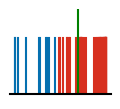

In [78]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.3, 1.1))
    lprobs1 = torch.log(func(batch1))
    lprobs2 = torch.log(func(batch2))
    lstar = torch.log(func(torch.as_tensor([theta_star])))
    for l in lprobs1:
        ax.plot([l.numpy(), l.numpy()], [0, 1], c="#d7301f")
    for l in lprobs2:
        ax.plot([l.numpy(), l.numpy()], [0, 1], c="#0570b0")
    
    ax.plot([lstar.numpy(), lstar.numpy()], [0, 1.5], c="green")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 1.5])
    ax.spines["left"].set_visible(False)
    # ax.set_xlabel(r"log(p($\theta$))")
    plt.savefig("../svg/panel_b.svg")

In [42]:
xx = torch.linspace(0.5,1.5, 50)
vals = xx**2
cum1 = torch.cumsum(vals, dim=0)
cum1 = cum1 / cum1[-1]

xx1 = torch.linspace(-1.5, -0.5, 50)
vals = xx1**2

In [43]:
cum2 = torch.cumsum(vals, dim=0)
cum2 = cum2 / cum2[-1]

In [44]:
xx = torch.linspace(0, 1, 50)

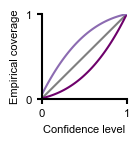

In [45]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.1, 1.1))
    ax.plot([0,1], [0,1], c="grey")
    ax.plot(xx.numpy(), cum1.numpy(), c="#6e016b")
    ax.plot(xx.numpy(), cum2.numpy(), c="#8c6bb1")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel(r"log(p($\theta$))")
    ax.set_xlabel("Confidence level")
    ax.set_ylabel("Empirical coverage")
    plt.savefig("../svg/panel_c.svg")

In [64]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [120]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

size = 15.7 * 0.65
f = Figure(f"{size}cm", "3.4cm",

    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale).move(0, 0),
          Text("a", 8, 10.0, **kwargs_text),
    ).move(-8, 3),
    Panel(
          SVG("../svg/theta.svg").scale(0.52).move(0, 0),
    ).move(60, 100),
    Panel(
          SVG("../svg/panel_b.svg").scale(svg_scale).move(0, 0),
          Text("b", -10, 8.5, **kwargs_text),
    ).move(135, 4.5),
    Panel(
          SVG("../svg/log_prob.svg").scale(0.7).move(0, 0),
    ).move(161, 99),
    Panel(
          SVG("../svg/panel_c.svg").scale(svg_scale).move(0, 0),
          Text("c", -10, 13.0, **kwargs_text),
        Text("overconf.", 73, 83.0, **kwargs_text8pt),
        Text("underconf.", 41, 20.0, **kwargs_text8pt),
    ).move(255, 0),
)

f.save("../fig/fig2.svg")
svg('../fig/fig2.svg')